In [1]:
import pandas as pd

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1

In [4]:
import sys

In [5]:
sys.path.append("./Pipeline")

In [6]:
import train_test_utils as tt_utils

In [7]:
%aimport base_class

In [8]:
URL = 'https://storage.googleapis.com/applied-dl/heart.csv'

In [9]:
base = base_class.Base(URL)

In [10]:
base.extract_data()

In [11]:
base.df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,1,1,118,186,0,2,190,0,0.0,2,0,fixed,0
299,43,0,4,132,341,1,2,136,1,3.0,2,0,reversible,1
300,65,1,4,135,254,0,2,127,0,2.8,2,1,reversible,1
301,48,1,4,130,256,1,2,150,1,0.0,1,2,reversible,1


In [12]:
base.prepare_data()

In [13]:
base.y

,target
0,0
1,1
2,0
3,0
4,0
...,...
298,0
299,1
300,1
301,1


In [14]:
%aimport train_test_class

In [57]:
trial = train_test_class.TrainTest(URL)

In [58]:
trial.extract_data()

In [59]:
trial.engineer_features()

In [60]:
trial.prepare_data()

In [61]:
trial.train_model('xgb', n_estimators = 100)

{'n_estimators': 100}


In [50]:
trial.test_model()

./Pipeline/train_test_utils.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [df_conf_mat['Pred']>=threshold])
./Pipeline/train_test_utils.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [df_conf_mat['Pred']>=threshold])
./Pipeline/train_test_utils.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [df_conf_mat['Pred']<threshold])
./Pipeline/train_test_utils.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  [df_conf_mat['Pred']<threshold])


Train Score: 0.995
Val.  Score: 0.796


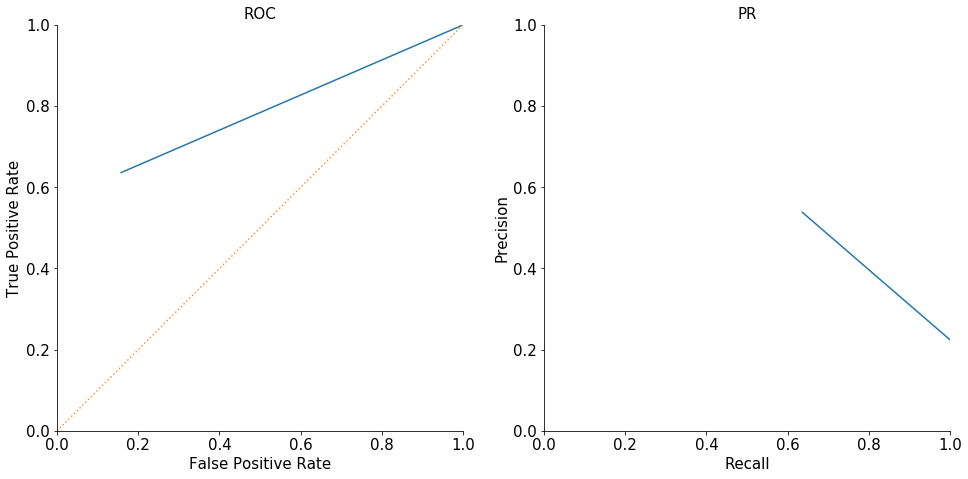

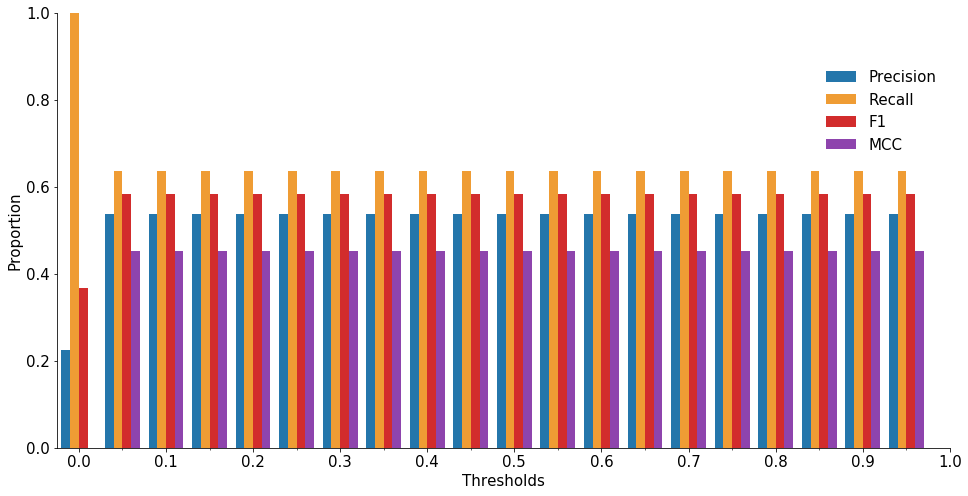

(<Figure size 1152x576 with 2 Axes>, <Figure size 1152x576 with 1 Axes>)

In [51]:
tt_utils.show_cm_graph(trial.cm_val)

In [22]:
trial.y_train.values.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
from tensorflow import feature_column

In [54]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

In [55]:
feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='trestbps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='chol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='thalach', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='oldpeak', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='slope', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ca', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [23]:
class trialclass():
    list_of_stuff = []
    def __init__(self):
        self.other_list = []
        
    def add_name(self, name):
        self.other_list.append(name)
        trialclass.list_of_stuff.append(name)

In [24]:
movie1 = trialclass()

In [25]:
movie1.add_name('Aladdin')

In [26]:
movie1.list_of_stuff

['Aladdin']

In [27]:
movie1.other_list

['Aladdin']

In [28]:
movie2 = trialclass()

In [29]:
movie2.add_name('Dumbo')

In [30]:
trialclass.list_of_stuff

['Aladdin', 'Dumbo']

In [31]:
movie2.list_of_stuff

['Aladdin', 'Dumbo']

In [32]:
movie2.other_list

['Dumbo']

In [33]:
movie1.list_of_stuff

['Aladdin', 'Dumbo']

In [34]:
movie1.other_list

['Aladdin']